# ADF検定メモ

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
# グラフを横長にする
plt.rcParams['figure.figsize'] = 15, 6
# 文字サイズの指定
plt.rcParams["font.size"] = 18

## 例の如く、どんなデータか確認

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',
                                    index_col='Month', parse_dates=True,  dtype='float')
ts = data['Passengers']

Text(0, 0.5, 'Passengers')

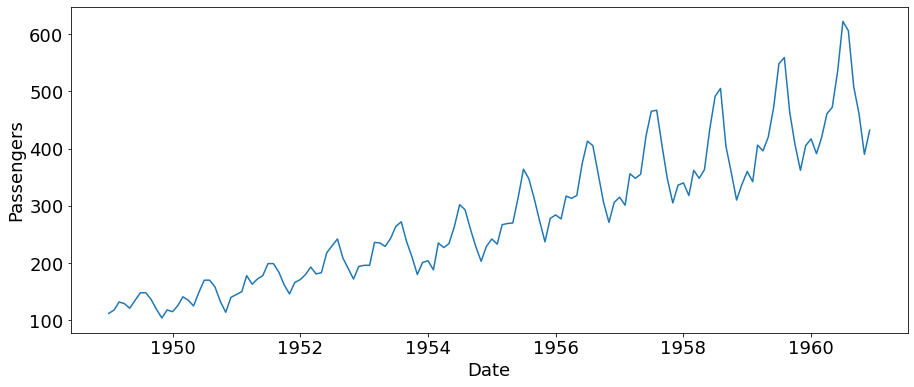

In [5]:
plt.plot(ts)
plt.xlabel('Date')
plt.ylabel('Passengers')

## 季節成分とトレンド、その残差への分解
- 12ヶ月の周期性に基づいて分解

In [6]:
res = seasonal_decompose(ts, model='additive', period=12)

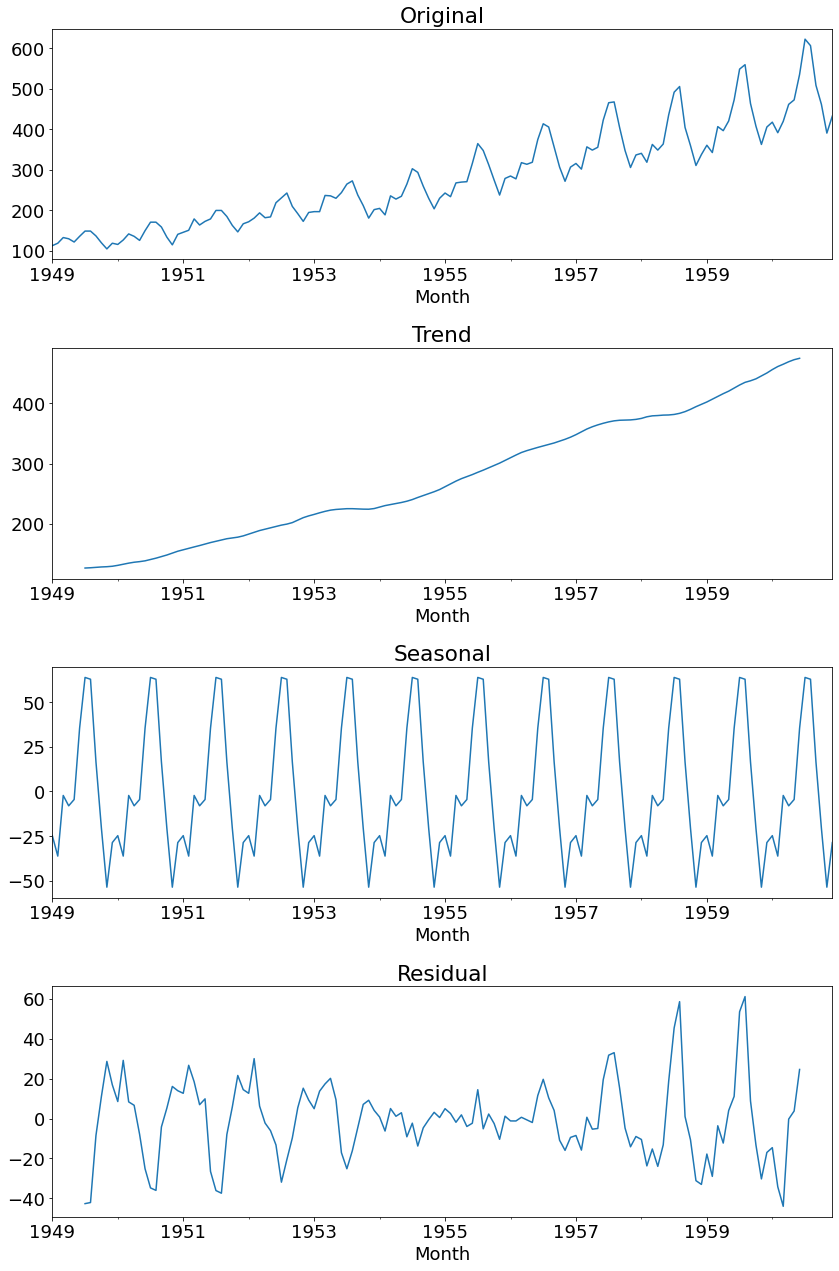

In [7]:
fig = plt.figure(figsize=(12,18))

ax1 = fig.add_subplot(411)
ax1.set_title('Original')
ax1 = res.observed.plot()

ax2 = fig.add_subplot(412)
ax2.set_title('Trend')
ax2 = res.trend.plot()

ax3 = fig.add_subplot(413)
ax3.set_title('Seasonal')
ax3 = res.seasonal.plot()

ax4 = fig.add_subplot(414)
ax4.set_title('Residual')
ax4 = res.resid.plot()

plt.tight_layout()

## 残差の定常性を検定する

下記ADF検定より、「過程が単位根過程である」帰無仮説が棄却される（p値が有意水準 5% を下回る）<br>
→ 残差は<font color="red">定常といえる</font><br>
→ SARIMA（トレンド・季節性を考慮したモデル）での解析の妥当性がいえる

In [11]:
residual = res.resid.dropna()

In [12]:
# トレンド項あり(2次まで)、定数項あり
ctt  = sm.tsa.stattools.adfuller(residual, regression="ctt")
# トレンド項あり（１次まで）、定数項あり
ct = sm.tsa.stattools.adfuller(residual, regression="ct")
# トレンド項なし、定数項あり
c = sm.tsa.stattools.adfuller(residual, regression="c")
# トレンド項なし、定数項なし
nc = sm.tsa.stattools.adfuller(residual, regression="nc")

print("p-value の比較")
print("---------------------------------------------------------------------------------------------------------------")
print("ctt:")
print(ctt[1])
print("---------------------------------------------------------------------------------------------------------------")
print("ct:")
print(ct[1])
print("---------------------------------------------------------------------------------------------------------------")
print("c:")
print(c[1])
print("---------------------------------------------------------------------------------------------------------------")
print("nc:")
print(nc[1])
print("---------------------------------------------------------------------------------------------------------------")

p-value の比較
---------------------------------------------------------------------------------------------------------------
ctt:
0.0002914626475910199
---------------------------------------------------------------------------------------------------------------
ct:
6.177766476033764e-05
---------------------------------------------------------------------------------------------------------------
c:
5.516868902226193e-06
---------------------------------------------------------------------------------------------------------------
nc:
2.981045201637143e-07
---------------------------------------------------------------------------------------------------------------
